# IMPORT Y FUNCIONES

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [ ]:
#https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist(path, kind):

    with gzip.open(os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind), 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(),
                               dtype=np.uint8,
                               offset=8)

    with gzip.open(os.path.join(path, '%s-images-idx3-ubyte.gz' % kind), 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(),
                               dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)

    return images, labels

# https://pandas.pydata.org/pandas-docs/version/1.1.5/user_guide/style.html

def df_high_max(row):

    # Select the maximum likelihood column(s)
    # Ignore first and last values (real and predicted label values)
    i_max = row == row[1:-1].max()

    # Apply CSS styling

    # Maximum likelihood column(s)
    s = ['font-weight: bold; color: green' if v else '' for v in i_max]

    # Real label column
    s[0] = 'font-weight: bold'

    # Predicted label column
    if row.iloc[0] != row.iloc[len(row) - 1]:
        s[len(row) - 1] = 'font-weight: bold; color: red'
    else:
        s[len(row) - 1] = 'font-weight: bold'

    return s

def get_pred_class(preds):
  i_max = np.argmax(preds[1:])

  return class_names[i_max]

# CARGA DEL DATASET

In [ ]:
#VAMOS A DESCARGAR EL DATASET DE INTERNET

mnist_fash = tf.keras.datasets.fashion_mnist

(train_img, train_lab), (test_img, test_lab) = mnist_fash.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('DATAPOINTS type:', type(train_img), '\n')

print('TRAIN DATAPOINTS:')
print('- Datapoints: ', train_img.shape)
print('- Labels:     ', train_lab.shape)

print('')

print('TEST DATAPOINTS:')
print('- Datapoints: ', test_img.shape)
print('- Labels:     ', test_lab.shape)

DATAPOINTS type: <class 'numpy.ndarray'> 

TRAIN DATAPOINTS:
- Datapoints:  (60000, 28, 28)
- Labels:      (60000,)

TEST DATAPOINTS:
- Datapoints:  (10000, 28, 28)
- Labels:      (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#INDICA EL NUMERO TOTAL DE ETIQUETAS
lab_unique = np.unique(train_lab)
print('Number of unique values:', len(lab_unique))
print('Unique values:\n', lab_unique)

#INDICA LOS VALORES QUE PUEDEN TOMAR LOS PIXELES -> MINIMO A MAXIMO DE LUMINANCIA 0 a 255
img_unique = np.unique(train_img)
print('Number of unique values:', len(img_unique))
print('Unique values:\n', img_unique)

Number of unique values: 10
Unique values:
 [0 1 2 3 4 5 6 7 8 9]
Number of unique values: 256
Unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


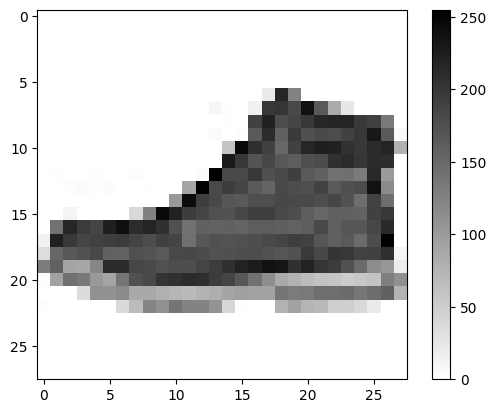

In [ ]:
#VAMOS A IMPRIMIR LAS ETIQUETAS CON EL NOMBRE Y ALGUNA IMAGEN DE EJEMPLO
for i in lab_unique:
    print(i, class_names[i])

plt.figure()
plt.imshow(train_img[89], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [ ]:
#LO SIGUIENTE QUE VAMOS A HACER ES NORMALIZAR LOS VALORES DE LOS PIZELES DE LAS IMÁGENES
train_img_norm = train_img / 255.0
test_img_norm = test_img / 255.0


img_norm_range = [np.min(train_img_norm), np.max(train_img_norm)]
print('Range: ', img_norm_range[0], img_norm_range[1])

Range:  0.0 1.0


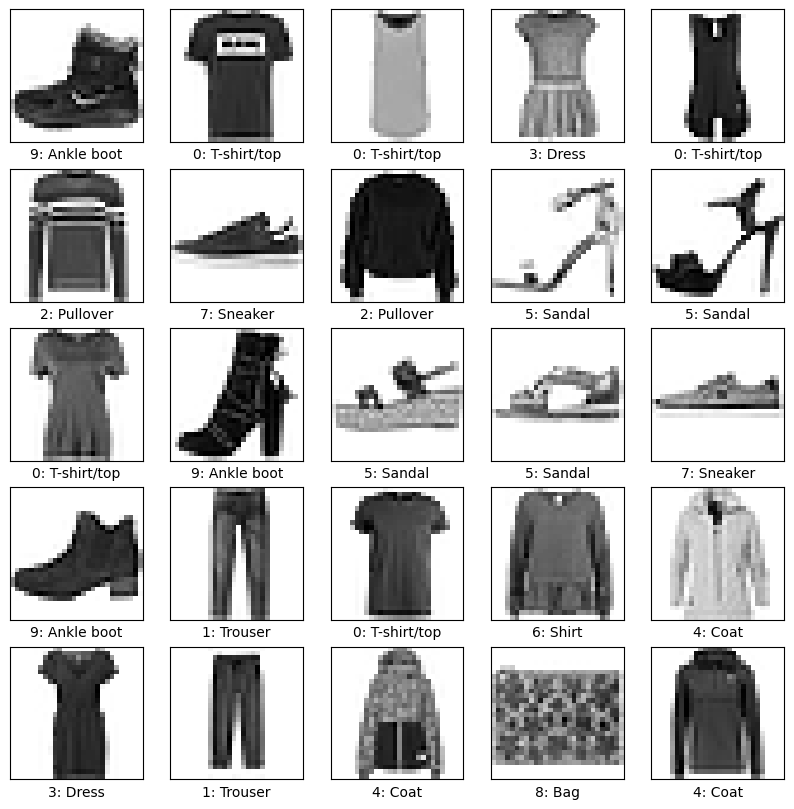

In [ ]:
#VAMOS A DIBUJAR LAS 25 PRIMERAS IMAGENES DEL DATASET DE ENTRENAMIENTO
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(str(train_lab[i]) + ': ' + class_names[train_lab[i]])
plt.show()

#CREACION DEL MODELO

In [ ]:
#NUESTRO MODELO VA A TENER UNA CAPA FLATTEN (pasar de 2d -> 1d), 2 CAPAS DENSE Y UNA CAPA SOFTMAX


model_clothes = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28), name = 'Flatten'),
    tf.keras.layers.Dense(128, activation = 'relu', name = 'Dense_128'),
    tf.keras.layers.Dense(10, name = 'Dense_10'),
    tf.keras.layers.Softmax(name = 'Softmax')
])

In [ ]:
model_clothes.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model_clothes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_128 (Dense)           (None, 128)               100480    
                                                                 
 Dense_10 (Dense)            (None, 10)                1290      
                                                                 
 Softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


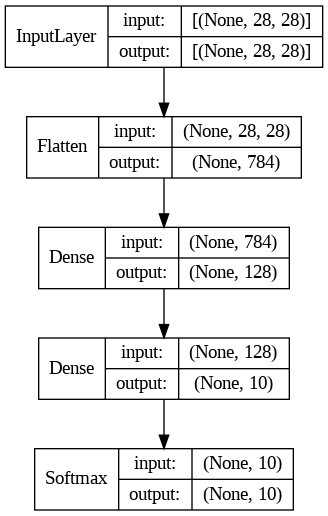

In [ ]:
tf.keras.utils.plot_model(model_clothes,
                          to_file=".\models_plot\model_clothes.png",
                          show_shapes=True,
                          show_trainable=False,
                          show_layer_names=False,
                          rankdir="TB")

# ENTRENAMIENTO DEL MODELO

In [ ]:
ini_params = model_clothes.get_weights()

model_clothes.set_weights(ini_params)

In [ ]:
#callback_es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
#                                              patience = 2)

#hist = model_clothes.fit(
#    train_img_norm,
#    train_lab,
#    validation_split = 0.2,
#   epochs = 40,
#    callbacks = [callback_es]
#)

In [ ]:
hist = model_clothes.fit(
      train_img_norm,
      train_lab,
      validation_split=0.2,
      epochs=40)

# 1500 = 60000 (train datapoints) * 0.2 (validation %) / 32 (default batch size)

Epoch 1/40
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5263 - accuracy: 0.8150 - val_loss: 0.4413 - val_accuracy: 0.8419
Epoch 2/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3884 - accuracy: 0.8604 - val_loss: 0.4155 - val_accuracy: 0.8522
Epoch 3/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3454 - accuracy: 0.8755 - val_loss: 0.3416 - val_accuracy: 0.8794
Epoch 4/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3199 - accuracy: 0.8835 - val_loss: 0.3955 - val_accuracy: 0.8659
Epoch 5/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3009 - accuracy: 0.8886 - val_loss: 0.3428 - val_accuracy: 0.8766
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2858 - accuracy: 0.8959 - val_loss: 0.3427 - val_accuracy: 0.8771
Epoch 7/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2697 - accuracy: 0.9004 - val_loss: 0.3214 - val_accuracy

# VER RESULTADOS

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

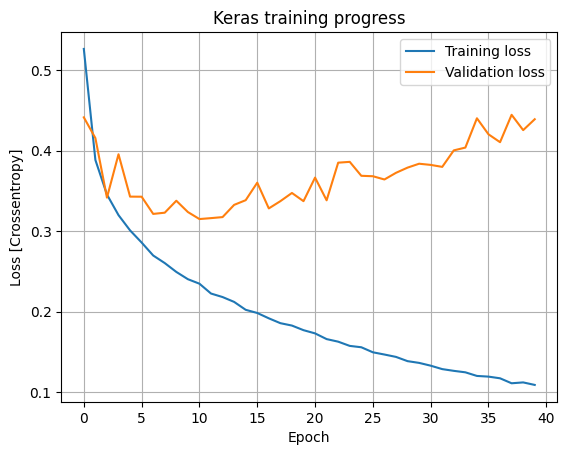

In [ ]:
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss [Crossentropy]')
plt.ylim([min(plt.ylim()), max(plt.ylim())])
plt.title('Keras training progress');
plt.grid(True);

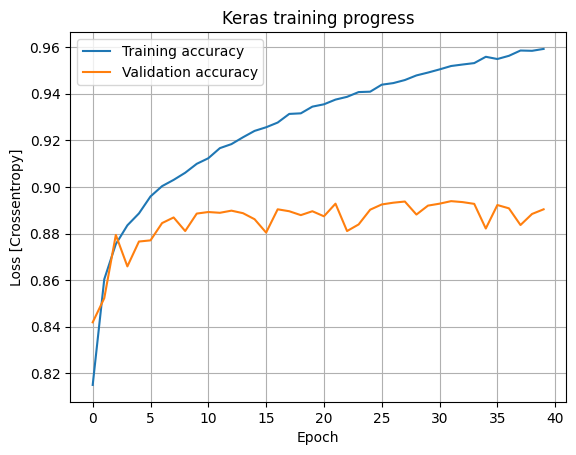

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss [Crossentropy]')
plt.ylim([min(plt.ylim()), max(plt.ylim())])
plt.title('Keras training progress');
plt.grid(True);

# EVALUACIÓN DE LA PRECISIÓN


In [ ]:
model_clothes.evaluate(test_img_norm, test_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.8858


[0.48045438528060913, 0.8858000040054321]

# HACEMOS PREDICCIONES

In [ ]:
for i in lab_unique:
  print(i, class_names[i])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
#Clothes to predict
pred_indices = [11, 53, 103, 129, 159, 203, 240, 310, 350, 400, 413, 430]

#Lista de ropa y etiquetas a predecir
list_pred_img = [test_img_norm[i] for i in pred_indices] #LISTA CON LAS IMÁGENES
list_pred_lab_ind = [test_lab[i] for i in pred_indices] #LISTA CON LAS ETIQUETAS NUMÉRICAS
list_pred_lab_name = [class_names[i] for i in list_pred_lab_ind] #LISTA CON LOS NOMBRES DE LAS CLASES

In [ ]:
print('Test images to predict: ', np.shape(list_pred_img))
print('Label indices to predict: ', np.shape(list_pred_lab_ind))
print('Label to predict: ', np.shape(list_pred_lab_name))

Test images to predict:  (12, 28, 28)
Label indices to predict:  (12,)
Label to predict:  (12,)


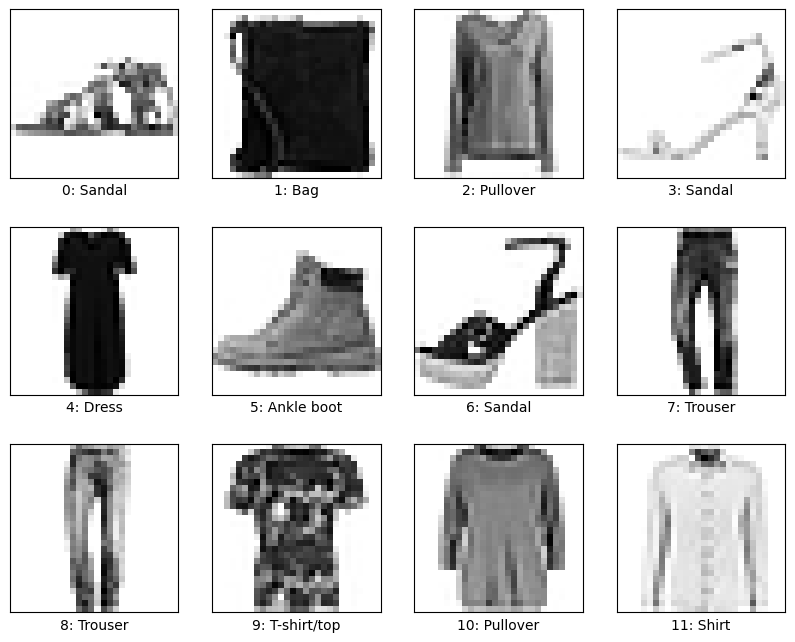

In [ ]:
#VAMOS A DIBUJAR LAS PRENDAS A PREDECIR
plt.figure(figsize=(10, 8))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(list_pred_img[i], cmap=plt.cm.binary)
  plt.xlabel(str(i) + ': ' + list_pred_lab_name[i])
plt.show()

In [ ]:
# https://keras.io/getting_started/faq/#whats-the-difference-between-model-methods-predict-and-call

In [ ]:
#CREAMOS UN TENSOR CON LAS IMAGENES A PREDECIR
tn_pred_img = tf.constant(list_pred_img)

print('Tensor con las imagenes a predecir: ', tn_pred_img.shape)

Tensor con las imagenes a predecir:  (12, 28, 28)


In [ ]:
#HACEMOS LA PREDICCION

res_p = model_clothes.predict(tn_pred_img)
print('Predictions:', res_p.shape)

1/1 [==============================] - 0s 91ms/step
Predictions: (12, 10)


In [ ]:
#CREAMOS UN DATAFRAME DEL RESULTADO DE LAS PREDICCIONES
res_df = pd.DataFrame(res_p, columns=class_names)

#INSERT REAL LABELS AS FIRTS COLUMN
res_df.insert(0, 'Real label', list_pred_lab_name)

#INSERT PREDICTED LABELS AS LAST COLUMN
res_df.insert(len(res_df.columns), 'Prediction', res_df.apply(get_pred_class, axis = 1, raw = True))

print('Dataframe with prediction result:', res_df.shape)

Dataframe with prediction result: (12, 12)


In [ ]:
res_df.style.apply(df_high_max, axis=1)

,Real label,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,Prediction
0,Sandal,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Sandal
1,Bag,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999997,0.000000,Bag
2,Pullover,0.010006,0.000000,0.204757,0.000069,0.000065,0.000000,0.785104,0.000000,0.000000,0.000000,Shirt
3,Sandal,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Sandal
4,Dress,0.000000,0.000000,0.000001,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dress
5,Ankle boot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.999992,Ankle boot
6,Sandal,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Sandal
7,Trouser,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Trouser
8,Trouser,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Trouser
9,T-shirt/top,0.999989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,T-shirt/top
